In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
from plotly import tools

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
df = pd.read_csv("Mall_Customers_3.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


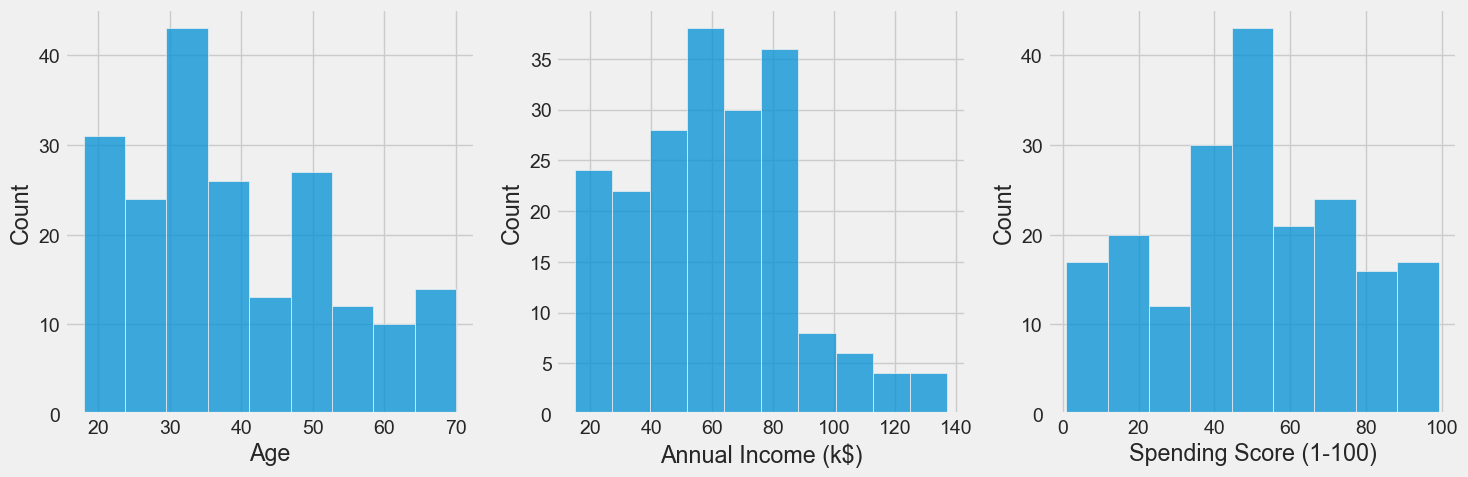

In [6]:
plt.figure(figsize = (16,5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'])

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'])

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'])

plt.show()

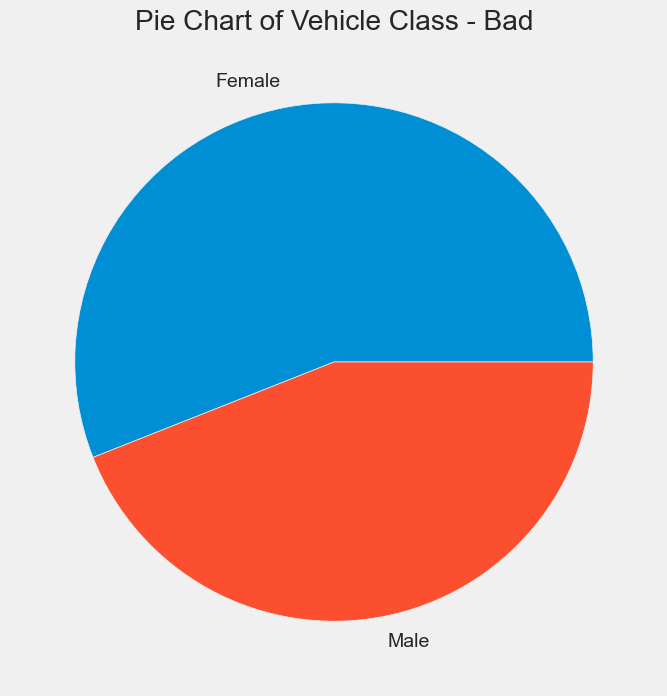

In [7]:
dm = df.groupby('Gender').size()

dm.plot(kind='pie', subplots=True, figsize=(15, 8))
plt.title("Pie Chart of Vehicle Class - Bad")
plt.ylabel("")
plt.show()

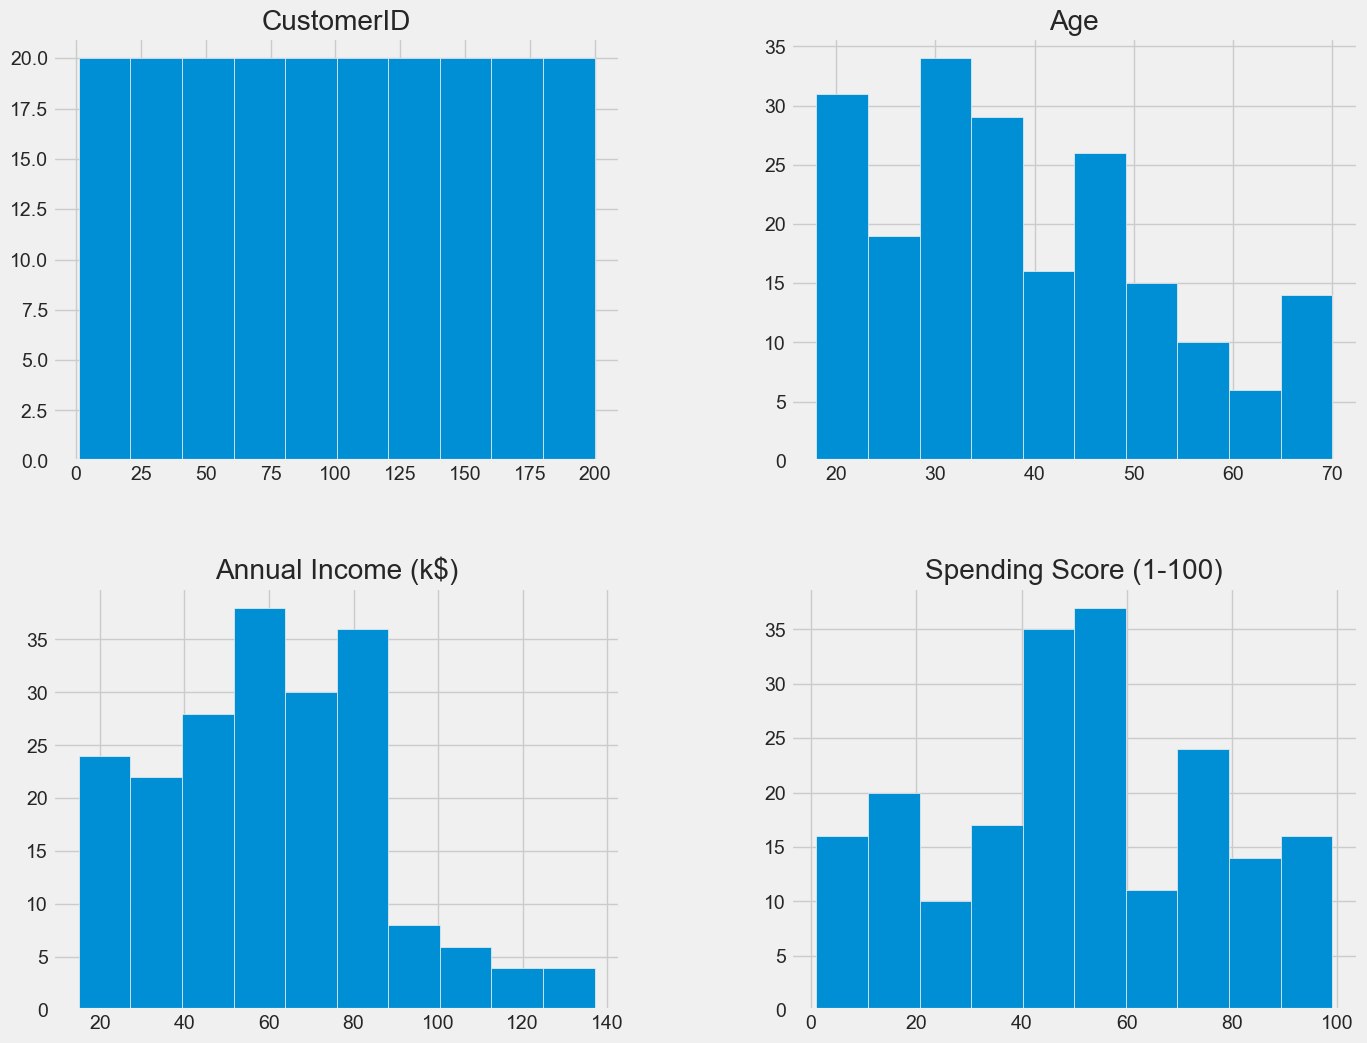

In [8]:
df.hist(figsize = (15, 12))
plt.show()

C:\Users\el mahdi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



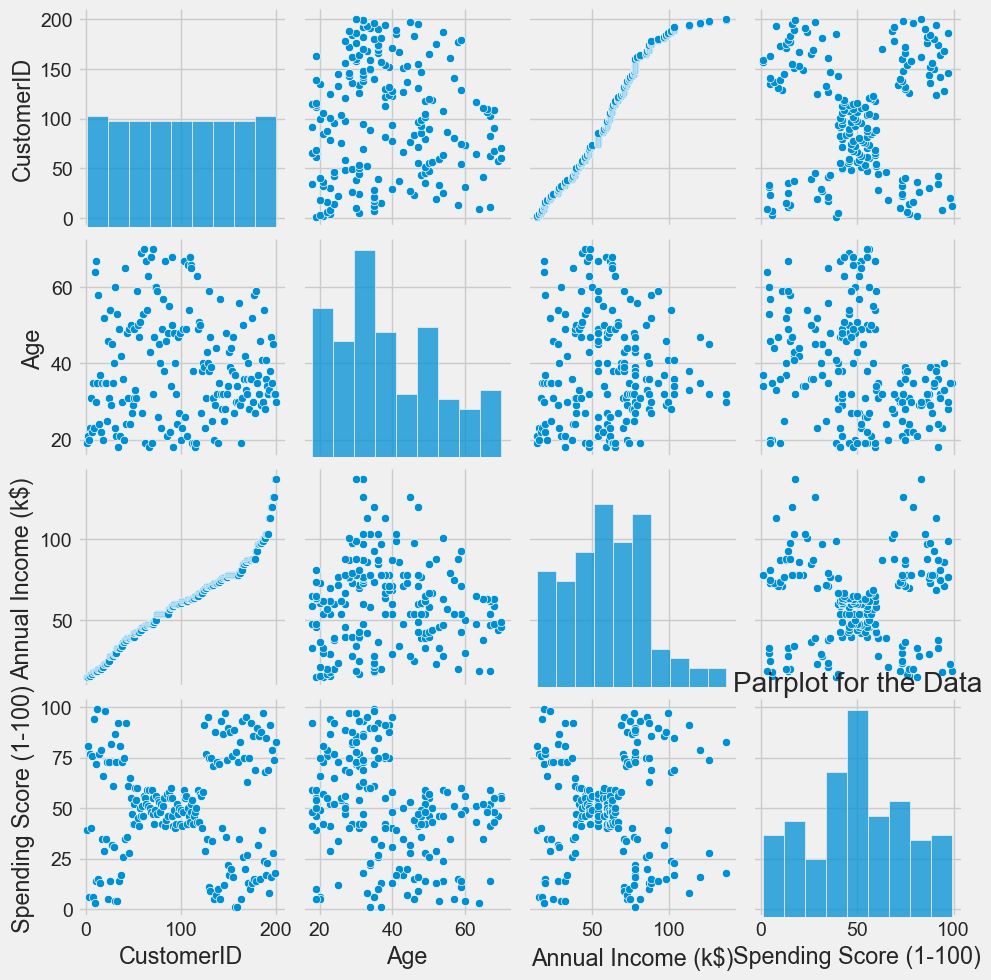

In [9]:
sns.pairplot(df)
plt.title('Pairplot for the Data')
plt.show()

C:\Users\el mahdi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



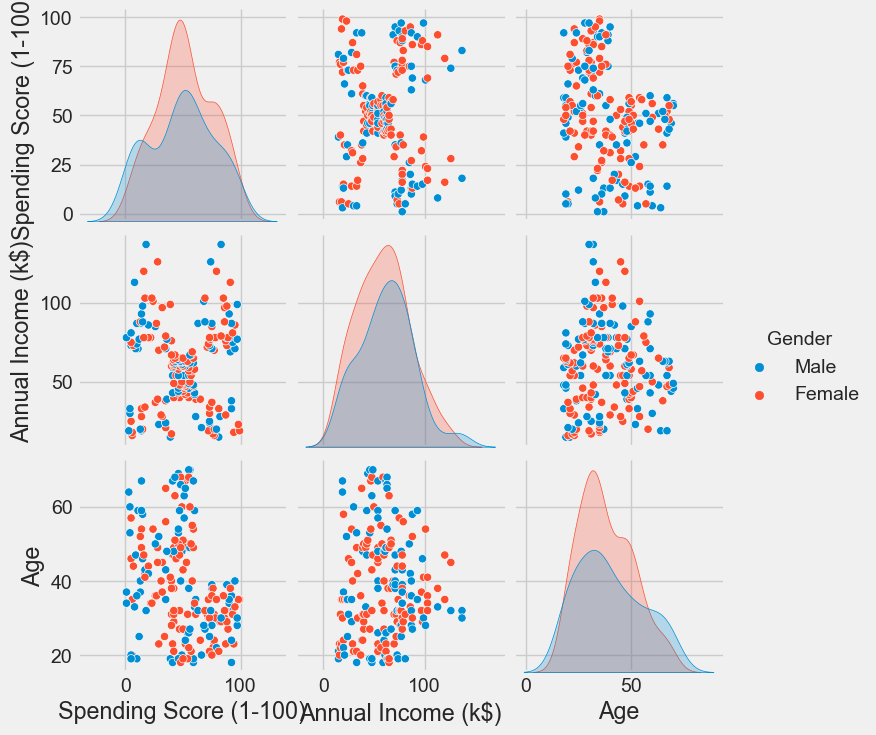

In [10]:
sns.pairplot(df,vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue="Gender")

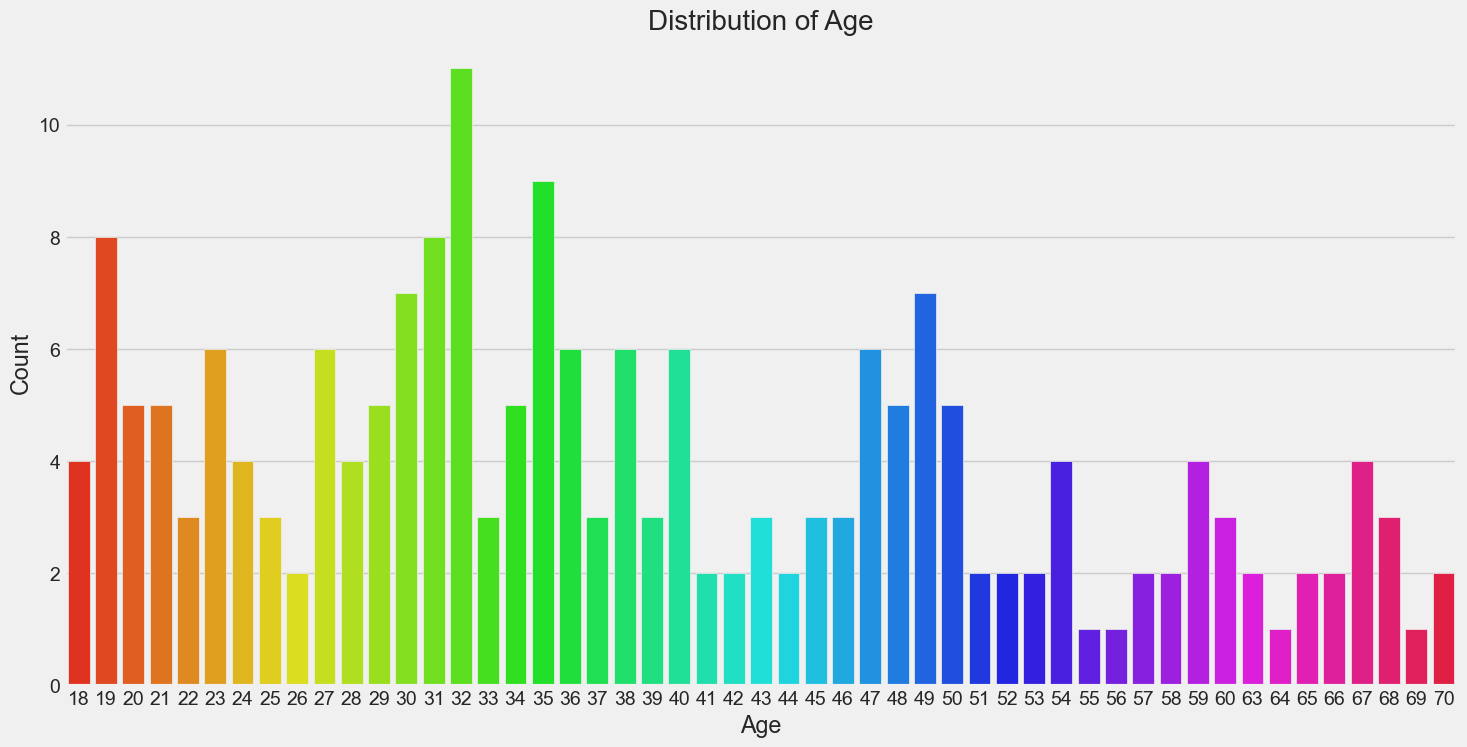

In [37]:
x = "Age"
plt.figure(figsize=(16, 8))
sns.countplot(data=df, x=x, palette='hsv')
plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



Text(0.5, 1.0, 'Distribution of Annual Income')

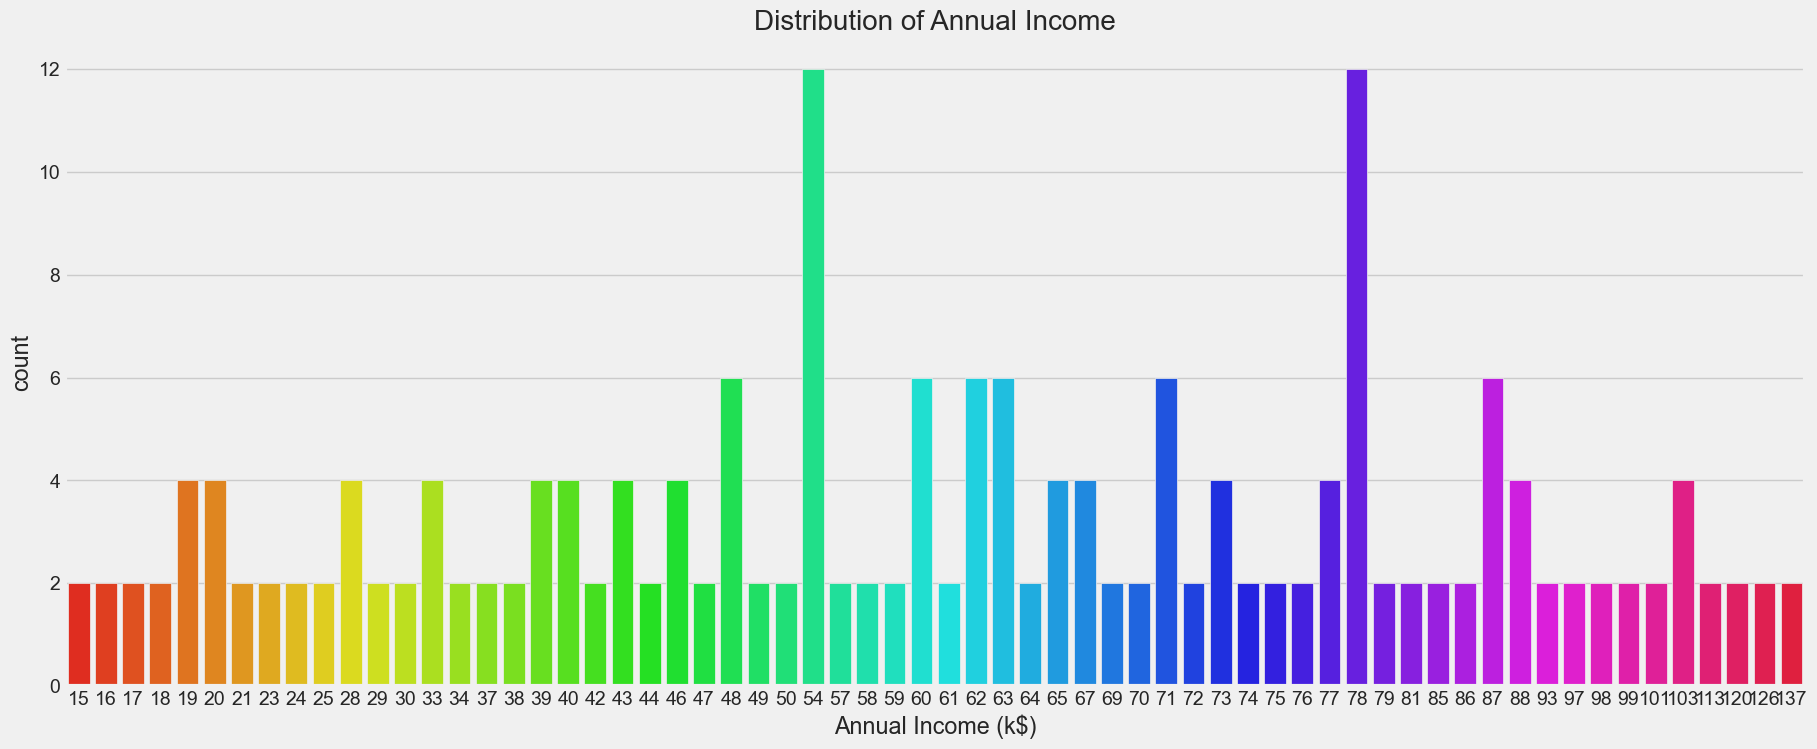

In [40]:
y = "Annual Income (k$)"
plt.figure(figsize = (20,8))
sns.countplot(data=df,x=y, palette = 'hsv')
plt.title('Distribution of Annual Income', fontsize = 20)

Text(0.5, 1.0, 'Distribution of Annual Income')

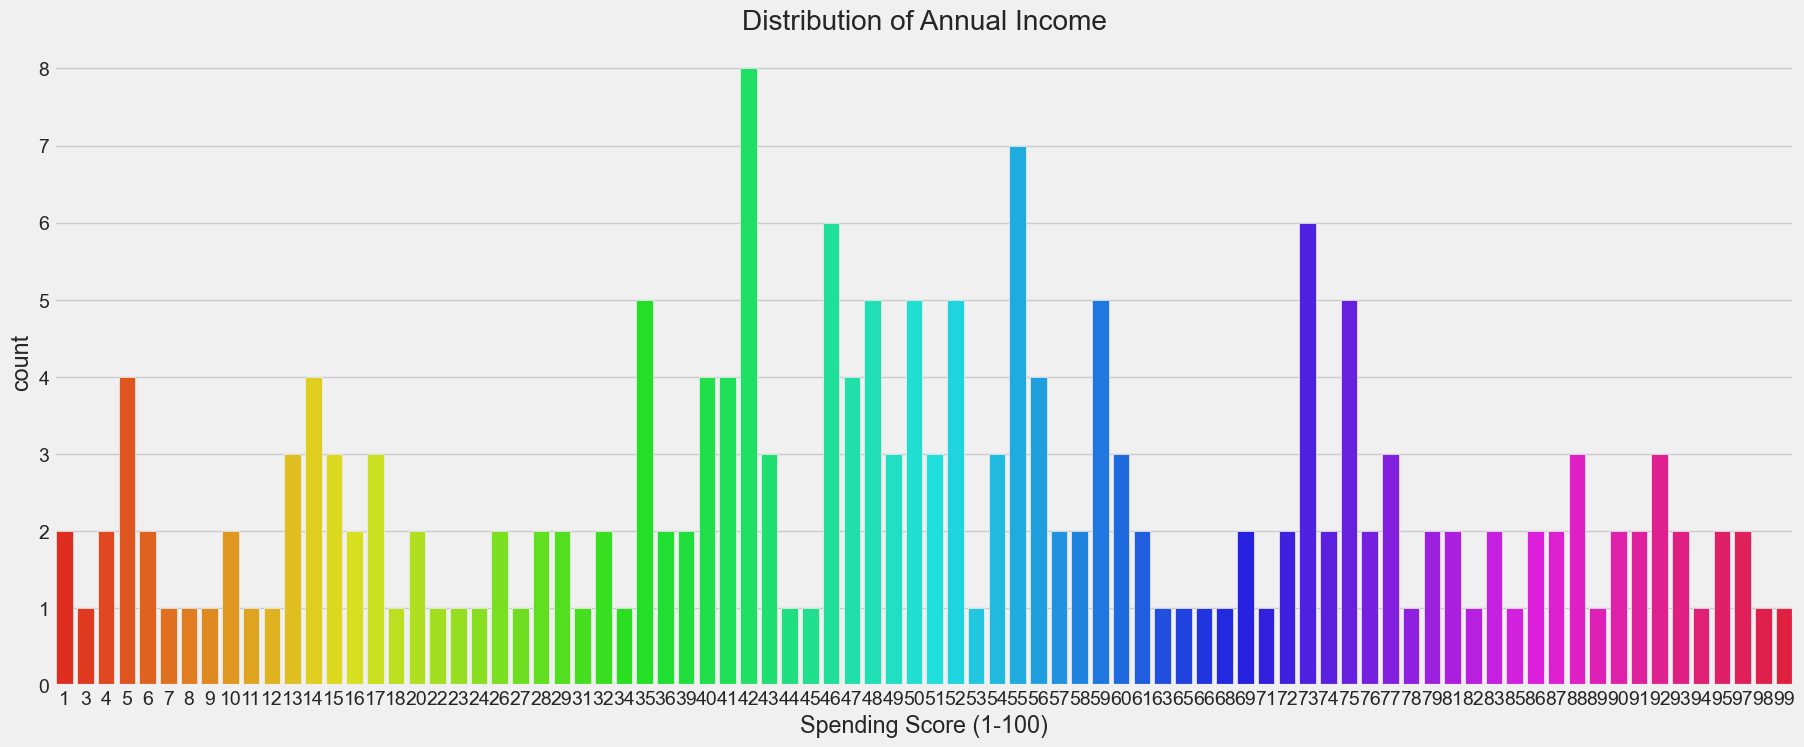

In [41]:
plt.figure(figsize = (20,8))
sns.countplot(x ='Spending Score (1-100)', data = df,palette = 'hsv' ) 
plt.title('Distribution of Annual Income')

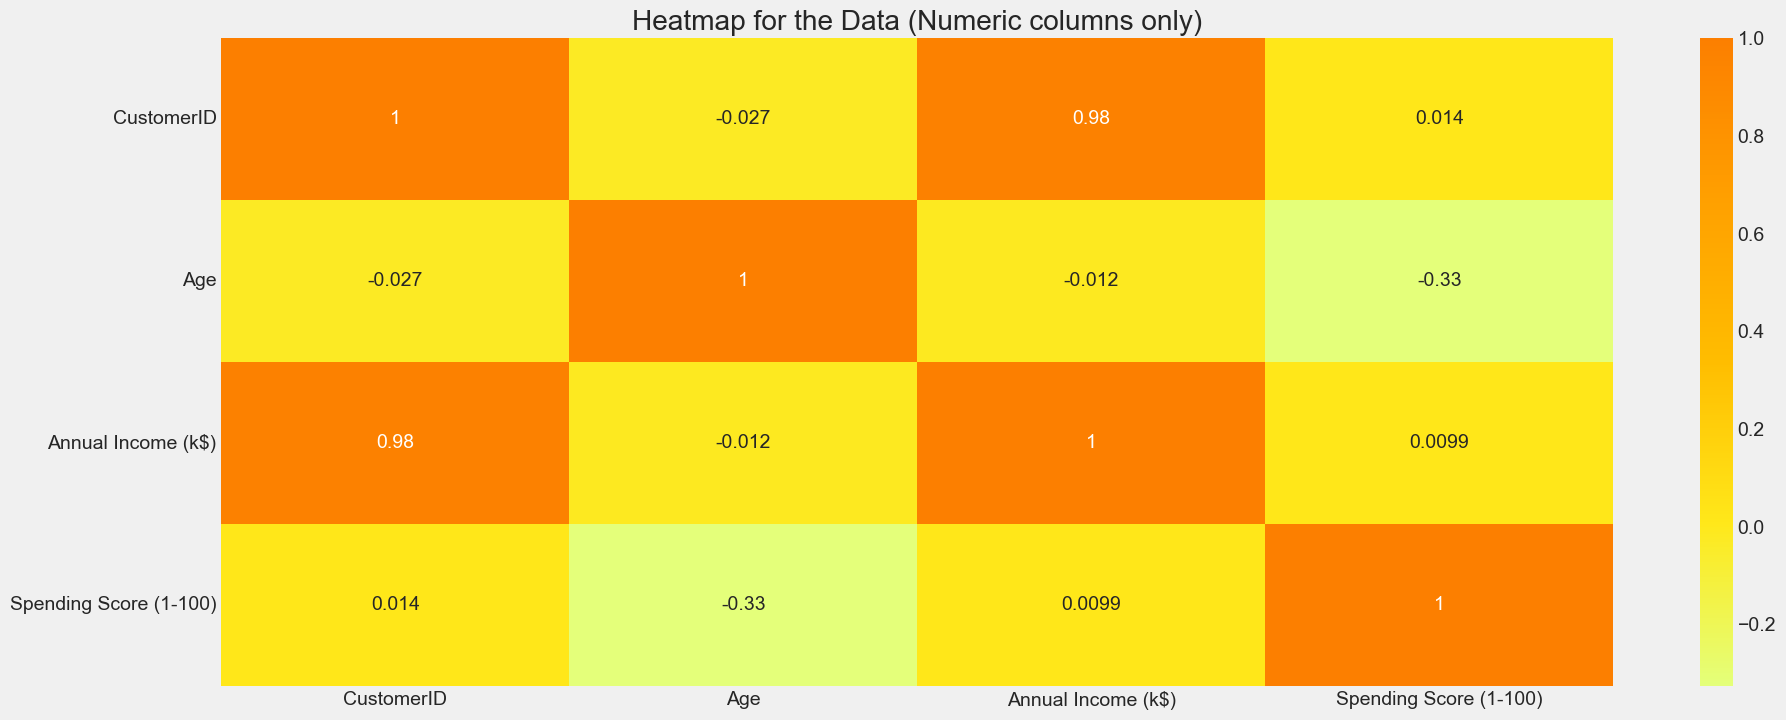

In [15]:
numerical_df = df.select_dtypes(include='number')
plt.figure(figsize=(20, 8))
sns.heatmap(numerical_df.corr(), cmap='Wistia', annot=True)
plt.title('Heatmap for the Data (Numeric columns only)')
plt.show()

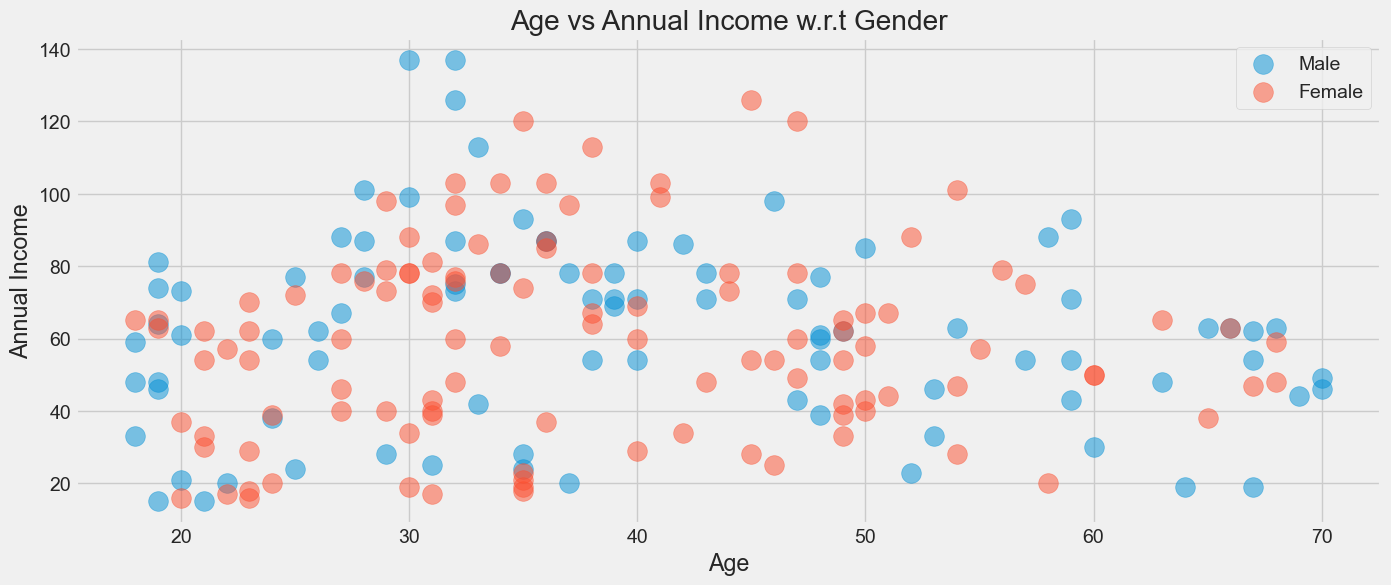

In [16]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age')
plt.ylabel('Annual Income') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

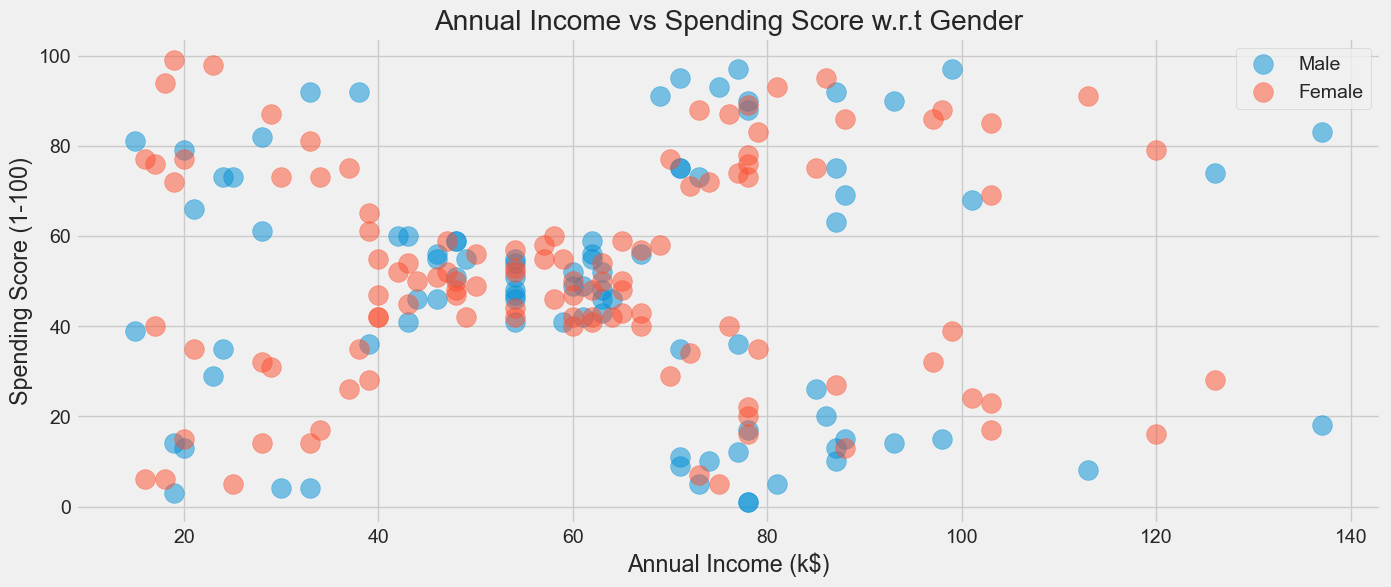

In [17]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), 
plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

clustering model

In [18]:
X= df.iloc[:, [3,4]].values

In [19]:
from sklearn.cluster import KMeans
k=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    k.append(kmeans.inertia_)

C:\Users\el mahdi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\el mahdi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\el mahdi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\el mahdi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

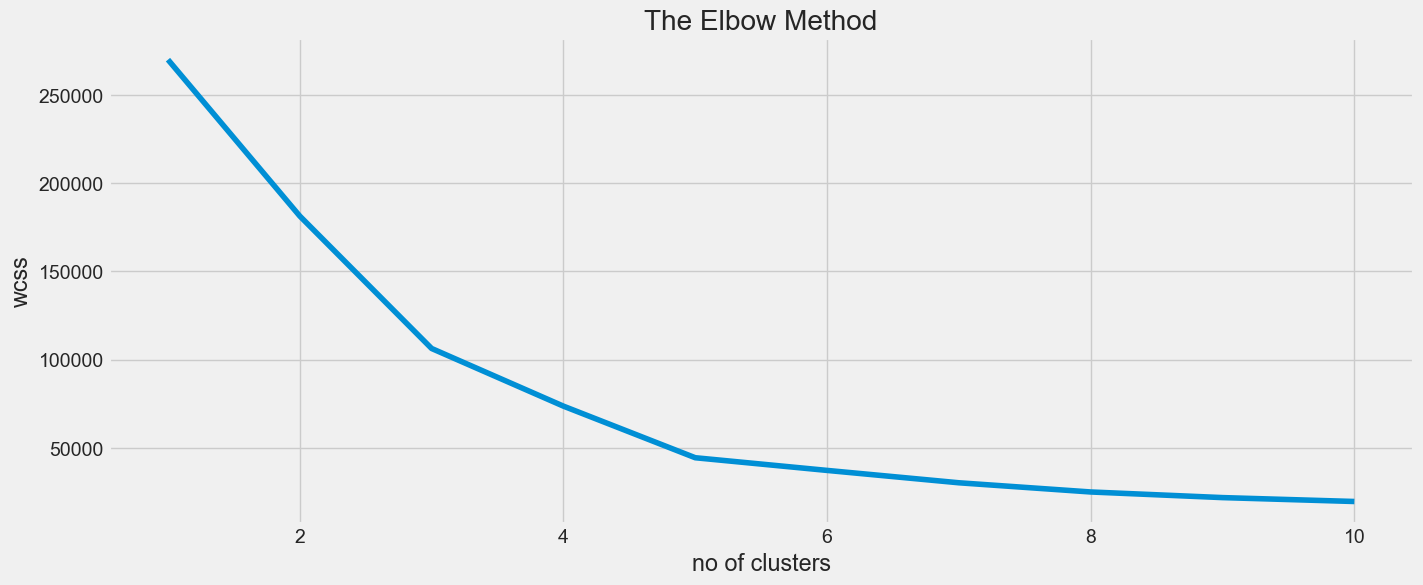

In [20]:
plt.figure(1 , figsize = (15 , 6))
plt.plot(range(1,11), k)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [21]:
model = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= model.fit_predict(X)

C:\Users\el mahdi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\el mahdi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



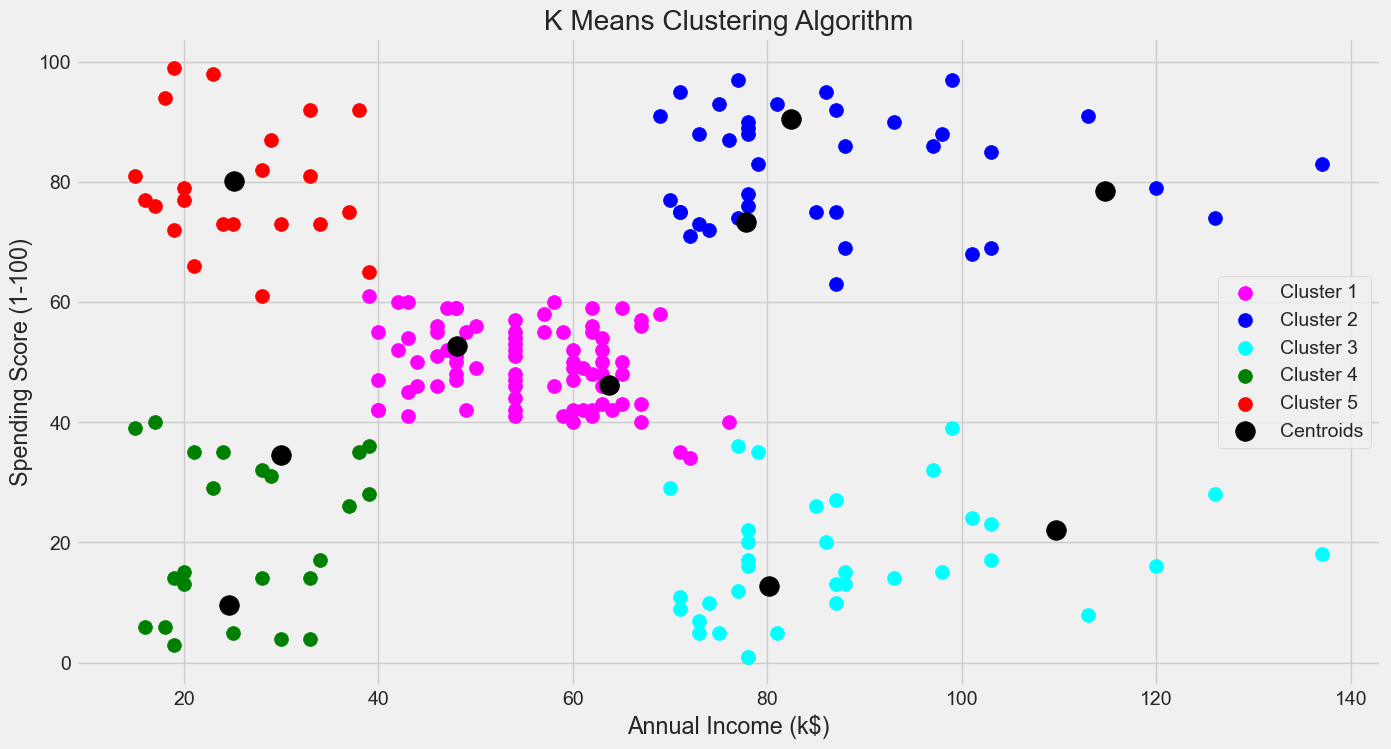

In [22]:
plt.figure(1 , figsize = (15 , 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'magenta', label = 'Cluster 1') ### Cluster 1
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')  ## Cluster 2
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')  ## Cluster 3
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'green', label = 'Cluster 4')  ## Cluster 4
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'red', label = 'Cluster 5')   ## Cluster 5
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('K Means Clustering Algorithm')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()